In [29]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_df = clinical_trial_data.merge(mouse_drug_data, how="left", on='Mouse ID')

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [30]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time_group = merge_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
drug_mean_volume = drug_time_group.reset_index()
# Convert to DataFrame
# Preview DataFrame
drug_mean_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [35]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = merge_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
standard_error_df = pd.DataFrame(standard_error).reset_index()
# Preview DataFrame
standard_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [36]:
# Minor Data Munging to Re-Format the Data Frames
drug_format = drug_mean_volume.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
drug_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [38]:
# Minor Data Munging to Re-Format the Data Frames
drug_standard_error = standard_error_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
drug_standard_error.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


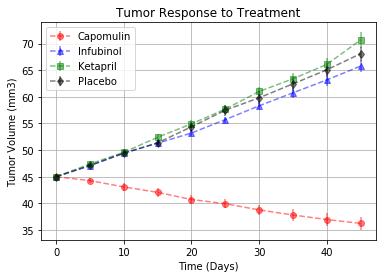

In [50]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(drug_format.index, drug_format["Capomulin"], yerr=drug_standard_error["Capomulin"], fmt="o", color="red", alpha=0.5, linestyle="dashed", label="Capomulin")
ax.errorbar(drug_format.index, drug_format["Infubinol"], yerr=drug_standard_error["Infubinol"], fmt="^", color="blue", alpha=0.5, linestyle="dashed", label="Infubinol")
ax.errorbar(drug_format.index, drug_format["Ketapril"], yerr=drug_standard_error["Ketapril"], fmt="s", color="green", alpha=0.5, linestyle="dashed", label="Ketapril")
ax.errorbar(drug_format.index, drug_format["Placebo"], yerr=drug_standard_error["Placebo"], fmt="d", color="black", alpha=0.5, linestyle="dashed", label="Placebo")

ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.grid()
ax.legend(loc="top left")
# Save the Figure
plt.savefig("Tumor_Response.png")

# Show the Figure
plt.show()


In [68]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_metastasis = merge_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
drug_metastasis_df = pd.DataFrame(drug_metastasis)
# Preview DataFrame
drug_metastasis_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [61]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_standard_error = merge_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
meta_standard_error = pd.DataFrame(meta_standard_error)
# Preview DataFrame
meta_standard_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [80]:
# Minor Data Munging to Re-Format the Data Frames
# Remember to reset index before pivoting
drug_metastasis_format = drug_metastasis_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
drug_metastasis_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [78]:
# Minor Data Munging to Re-Format the Data Frames
meta_standard_error = meta_standard_error.reset_index()
meta_standard_error_format = meta_standard_error.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked
meta_standard_error_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [79]:
drug_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


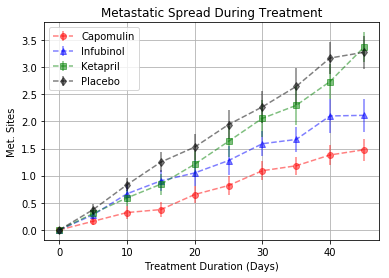

In [92]:
# Generate the Plot (with Error Bars)
fig, ax= plt.subplots()

ax.errorbar(drug_metastasis_format.index, drug_metastasis_format["Capomulin"], yerr=meta_standard_error_format["Capomulin"], fmt="o", color="red", alpha=0.5, linestyle="dashed", label="Capomulin")
ax.errorbar(drug_metastasis_format.index, drug_metastasis_format["Infubinol"], yerr=meta_standard_error_format["Infubinol"], fmt="^", color="blue", alpha=0.5, linestyle="dashed", label="Infubinol")
ax.errorbar(drug_metastasis_format.index, drug_metastasis_format["Ketapril"], yerr=meta_standard_error_format["Ketapril"], fmt="s", color="green", alpha=0.5, linestyle="dashed", label="Ketapril")
ax.errorbar(drug_metastasis_format.index, drug_metastasis_format["Placebo"], yerr=meta_standard_error_format["Placebo"], fmt="d", color="black", alpha=0.5, linestyle="dashed", label="Placebo")

ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")
ax.grid()
ax.legend(loc="top left")
# Save the Figure
plt.savefig("Metastatic_Spread.png")
# Show the Figure
plt.show()

In [96]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = merge_df.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
# Convert to DataFrame
mice_count = pd.DataFrame(mice_count).reset_index()
# Preview DataFrame
mice_count.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [105]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_format = mice_count.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview the Data Frame
mice_count_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


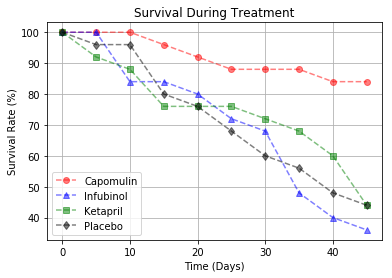

In [110]:
# Generate the Plot (Accounting for percentages)
fig, ax= plt.subplots()

ax.plot(100 * mice_count_format["Capomulin"] / 25, "o", color="red", alpha=0.5, linestyle="dashed", label="Capomulin")
ax.plot(100 * mice_count_format["Infubinol"] / 25, "^", color="blue", alpha=0.5, linestyle="dashed", label="Infubinol")
ax.plot(100 * mice_count_format["Ketapril"] / 25, "s", color="green", alpha=0.5, linestyle="dashed", label="Ketapril")
ax.plot(100 * mice_count_format["Placebo"] / 25, "d", color="black", alpha=0.5, linestyle="dashed", label="Placebo")

ax.set_title("Survival During Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.grid()
ax.legend(loc="bottom left")
# Save the Figure
plt.savefig("Survival.png")
# Show the Figure
plt.show()

In [111]:
# Calculate the percent changes for each drug
tumor_change = ((drug_format.iloc[-1] - drug_format.iloc[0]) / drug_format.iloc[0]) * 100
# Display the data to confirm
tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

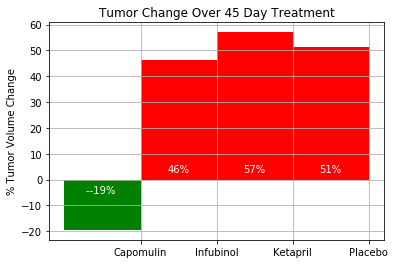

In [150]:
# Store all Relevant Percent Changes into a Tuple
relevant_change = (tumor_change["Capomulin"], 
                   tumor_change["Infubinol"],
                   tumor_change["Ketapril"],
                   tumor_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(relevant_change))  
Pass = ax.bar(ind[0], relevant_change[0], width=1, color='green')
Fail = ax.bar(ind[1:], relevant_change[1:], width=1, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_xticklabels(("Capomulin", "Infubinol", "Ketapril", "Placebo"))
ax.set_xticks(ind + 0.5)
ax.grid()

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 2,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -6,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(Pass)
autolabelFail(Fail)

# Save the Figure
plt.savefig("Tumor_Change")

# Show the Figure
fig.show()